<a href="https://colab.research.google.com/github/Firoz-Hasan/Android-Cheat-sheet/blob/master/transfer_learning/brain_tumor_detection_fastai_resnet34.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import pandas as pd
import numpy as np
from PIL import Image
import plotly.express as px
import os
from fastai.vision.all import *
from fastai.vision import widgets

In [1]:
! pip install -Uq kaggle
! pip install -Uq fastai==2.7.12

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"firozhasan009","key":"0b371227bb0f240327858d9110e4db79"}'}

In [3]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d navoneel/brain-mri-images-for-brain-tumor-detection

 33% 5.00M/15.1M [00:00<00:00, 49.0MB/s]
100% 15.1M/15.1M [00:00<00:00, 103MB/s] 


In [7]:
from zipfile import ZipFile
file_name = "/content/brain-mri-images-for-brain-tumor-detection.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')


Done


In [12]:
path = Path('./brain_tumor_dataset')

In [13]:
path.ls()

(#2) [Path('brain_tumor_dataset/yes'),Path('brain_tumor_dataset/no')]

In [14]:
yes_f = (path/'yes').ls().sorted()
no_f = (path/'no').ls().sorted()
yes_f

(#155) [Path('brain_tumor_dataset/yes/Y1.jpg'),Path('brain_tumor_dataset/yes/Y10.jpg'),Path('brain_tumor_dataset/yes/Y100.JPG'),Path('brain_tumor_dataset/yes/Y101.jpg'),Path('brain_tumor_dataset/yes/Y102.jpg'),Path('brain_tumor_dataset/yes/Y103.jpg'),Path('brain_tumor_dataset/yes/Y104.jpg'),Path('brain_tumor_dataset/yes/Y105.jpg'),Path('brain_tumor_dataset/yes/Y106.jpg'),Path('brain_tumor_dataset/yes/Y107.jpg')...]

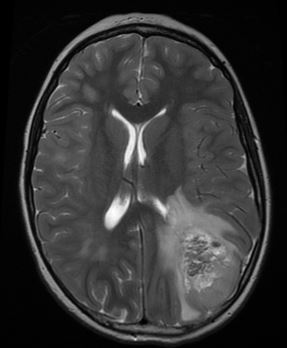

In [16]:
im_path = yes_f[2]
im = Image.open(im_path)
im

In [17]:
im.size

(287, 348)

In [18]:
images = DataBlock(blocks=(ImageBlock, CategoryBlock),
                  get_items=get_image_files,
                  splitter=RandomSplitter(valid_pct=0.2, seed=42),
                  get_y=parent_label,
                  item_tfms=Resize(128),
                  batch_tfms=aug_transforms(size=224))

In [19]:
dls = images.dataloaders(path)

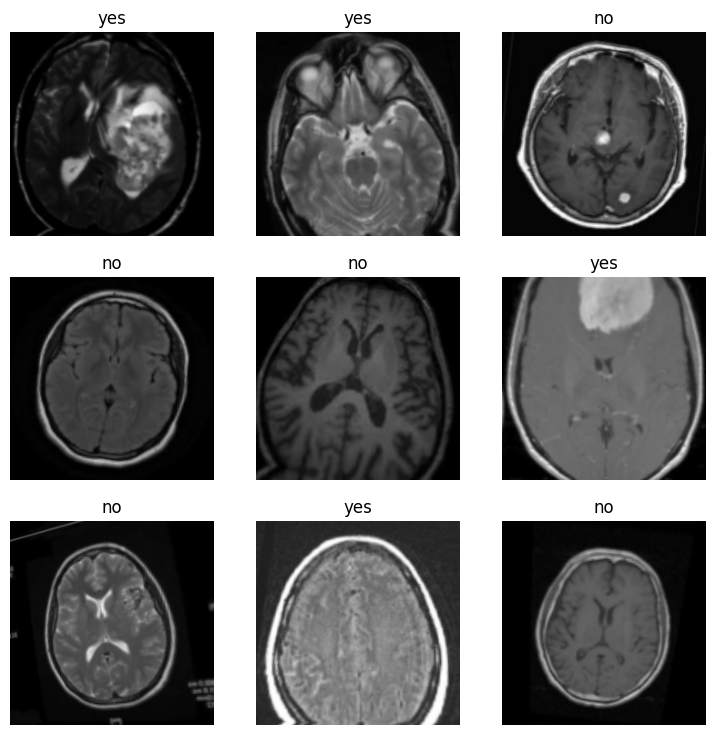

In [20]:
dls.show_batch()

In [21]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(4)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:01<00:00, 71.3MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,1.112529,1.100680,0.380000,01:26


epoch,train_loss,valid_loss,error_rate,time
0,0.787643,1.131045,0.360000,01:57
1,0.631218,1.166748,0.320000,01:58
2,0.528297,0.834991,0.320000,02:00
3,0.489249,0.654388,0.200000,01:59


In [25]:
btn_upload = widgets.FileUpload()
def on_click_upload(change):
    btn_upload.value.clear()
    btn_upload._counter = 1
btn_upload.observe(on_click_upload)

In [26]:
out = widgets.Output()
lbl = widgets.Label()

In [27]:
btn_classify = widgets.Button(description='Classify')
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out.clear_output()
    with out: display(img.to_thumb(128,128))
    pred, pred_idx, probs = learn.predict(img)
    lbl.value = f'Prediction: {pred.upper()}; Probability: {probs[pred_idx]:.04f}'
btn_classify.on_click(on_click_classify)

In [28]:
widgets.VBox([widgets.Label('Select your scan!)'), btn_upload, btn_classify, out, lbl])